In [14]:
import pandas as pd

In [15]:
z = pd.read_csv('./signal_xyz/z.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
z=z[['0','10','18','Time']]

In [ ]:
label_62 =pd.read_csv('./label/label_62.csv')
label_66 = pd.read_csv('./label/label_66.csv')

In [ ]:
label_62 = label_62.rename(columns={'time':'Time'})
label_66 = label_66.rename(columns={'time':'Time'})

In [ ]:
def merge_dataframes_on_time(df1, df2):
    # 'Time' 열을 기준으로 두 데이터프레임을 합병
    # how='inner'는 두 데이터프레임에 모두 존재하는 'Time' 값에 대해서만 합병을 수행
    merged_df = pd.merge(df1, df2, on='Time', how='inner')
    return merged_df


In [ ]:
Label_62 = merge_dataframes_on_time(label_62,z)
Label_66 = merge_dataframes_on_time(label_66,z)

In [ ]:
Label_62.to_csv('./label/new_label_62.csv',index=False)
Label_66.to_csv('./label/new_label_66.csv',index=False)

In [ ]:
print(Label_62.isnull().sum())
Label_62.head(5)

Time                      0
Active_Power_W1           4
Active_Power_W2          17
Active_Power_W3           0
Apparent_Power_Va1        0
Apparent_Power_Va2        0
Apparent_Power_Va3        0
Line_Current_L1           0
Line_Current_L2           0
Line_Current_L3           0
Line_Voltage_V12          0
Line_Voltage_V23          0
Line_Voltage_V31      31645
x                       511
y                       479
z                       479
Derived Variable        511
label                     0
0                         0
10                        0
18                        0
dtype: int64


,Time,Active_Power_W1,Active_Power_W2,Active_Power_W3,Apparent_Power_Va1,Apparent_Power_Va2,Apparent_Power_Va3,Line_Current_L1,Line_Current_L2,Line_Current_L3,...,Line_Voltage_V23,Line_Voltage_V31,x,y,z,Derived Variable,label,0,10,18
0,2023-08-23 19:00:53,35.0,32.0,36.0,54.0,49.0,52.0,44.0,39.0,40.0,...,2218.0,2212.0,-0.007770,-0.006913,-0.007286,0.007320,0,-208.509120,1.037426,2.512677
1,2023-08-23 19:00:54,35.0,32.0,36.0,54.6,49.6,52.0,44.0,39.0,40.6,...,2218.6,2211.4,-0.007919,-0.007004,-0.007491,0.007483,0,-197.385868,-0.895078,1.484191
2,2023-08-23 19:00:55,35.0,32.0,36.0,55.0,50.0,52.0,44.0,39.0,41.0,...,2219.0,2211.0,-0.007765,-0.006846,-0.007353,0.007336,0,-201.704650,1.028285,2.724372
3,2023-08-23 19:00:56,35.0,32.0,36.0,55.0,50.0,52.0,44.0,39.0,41.0,...,2219.0,2211.0,-0.007662,-0.007126,-0.007533,0.007466,0,-205.790858,-1.713855,1.861062
4,2023-08-23 19:00:57,35.0,32.0,36.0,54.9,49.9,52.0,44.0,38.9,40.9,...,2219.0,2211.0,-0.007840,-0.007077,-0.007510,0.007489,0,-216.457232,-1.344095,3.219959


<Axes: >

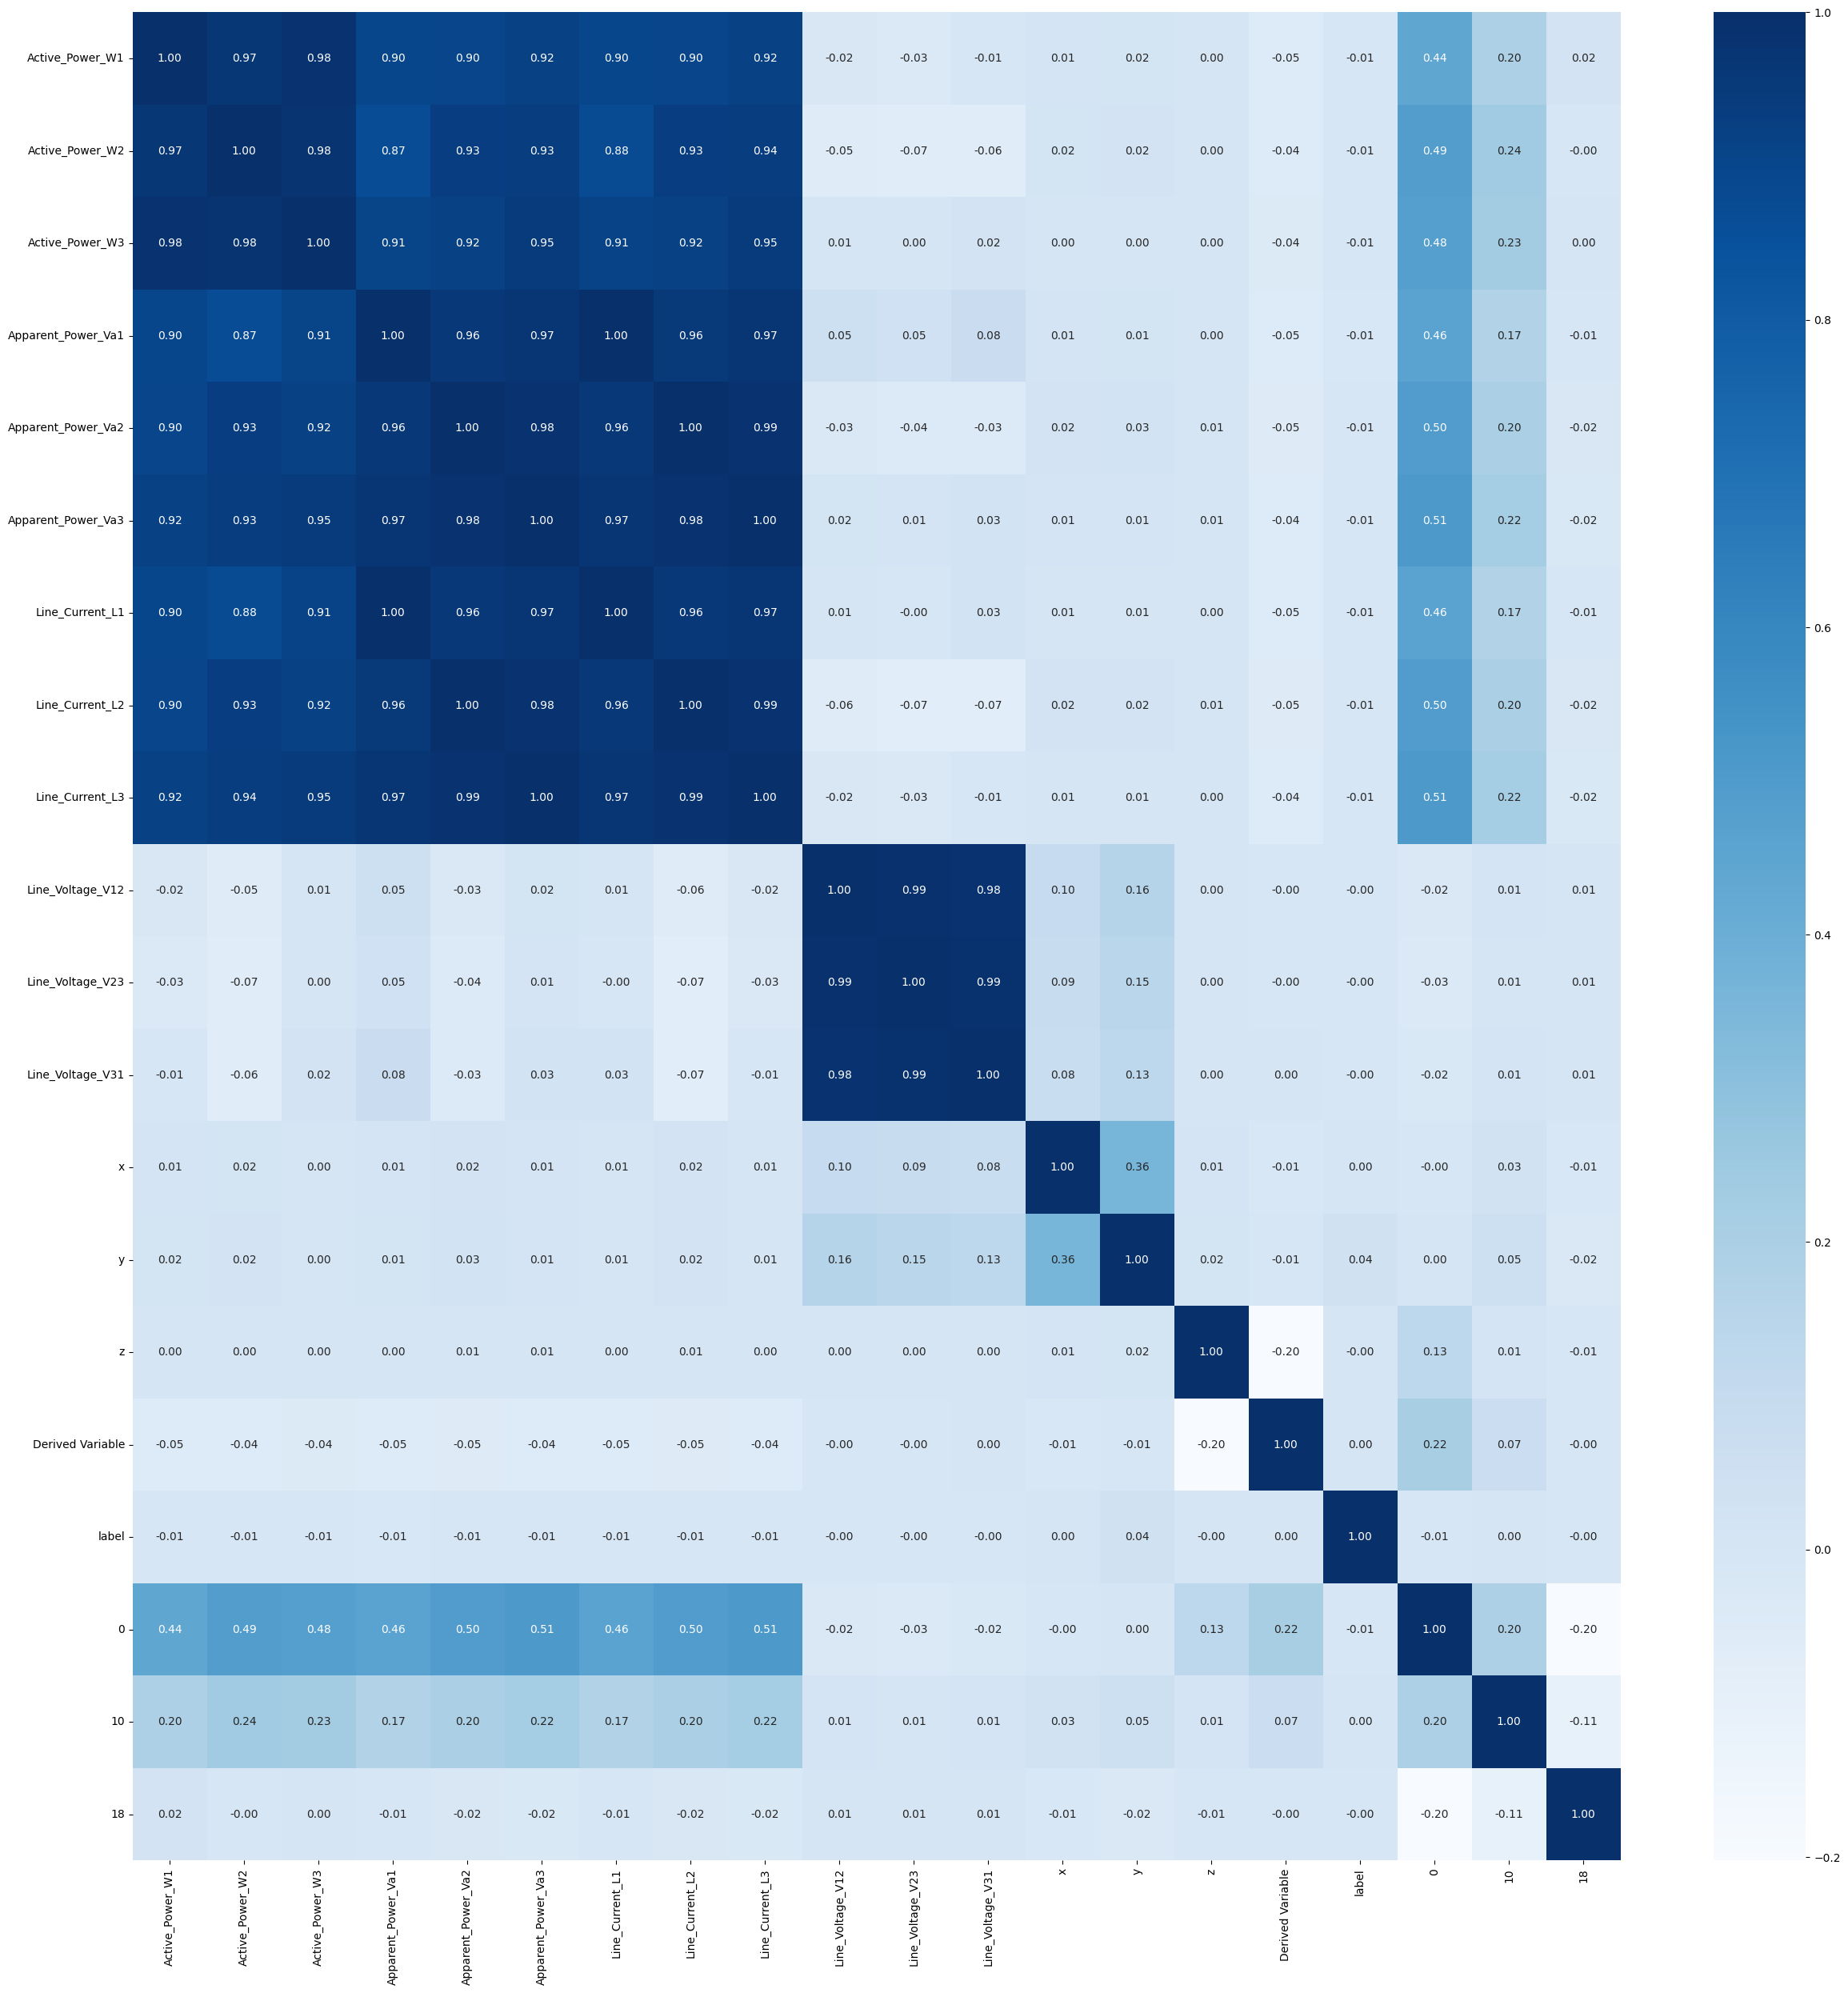

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_62 = Label_62.drop('Time',axis=1).corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_62, annot=True, fmt=".2f", cmap="Blues")

<Axes: >

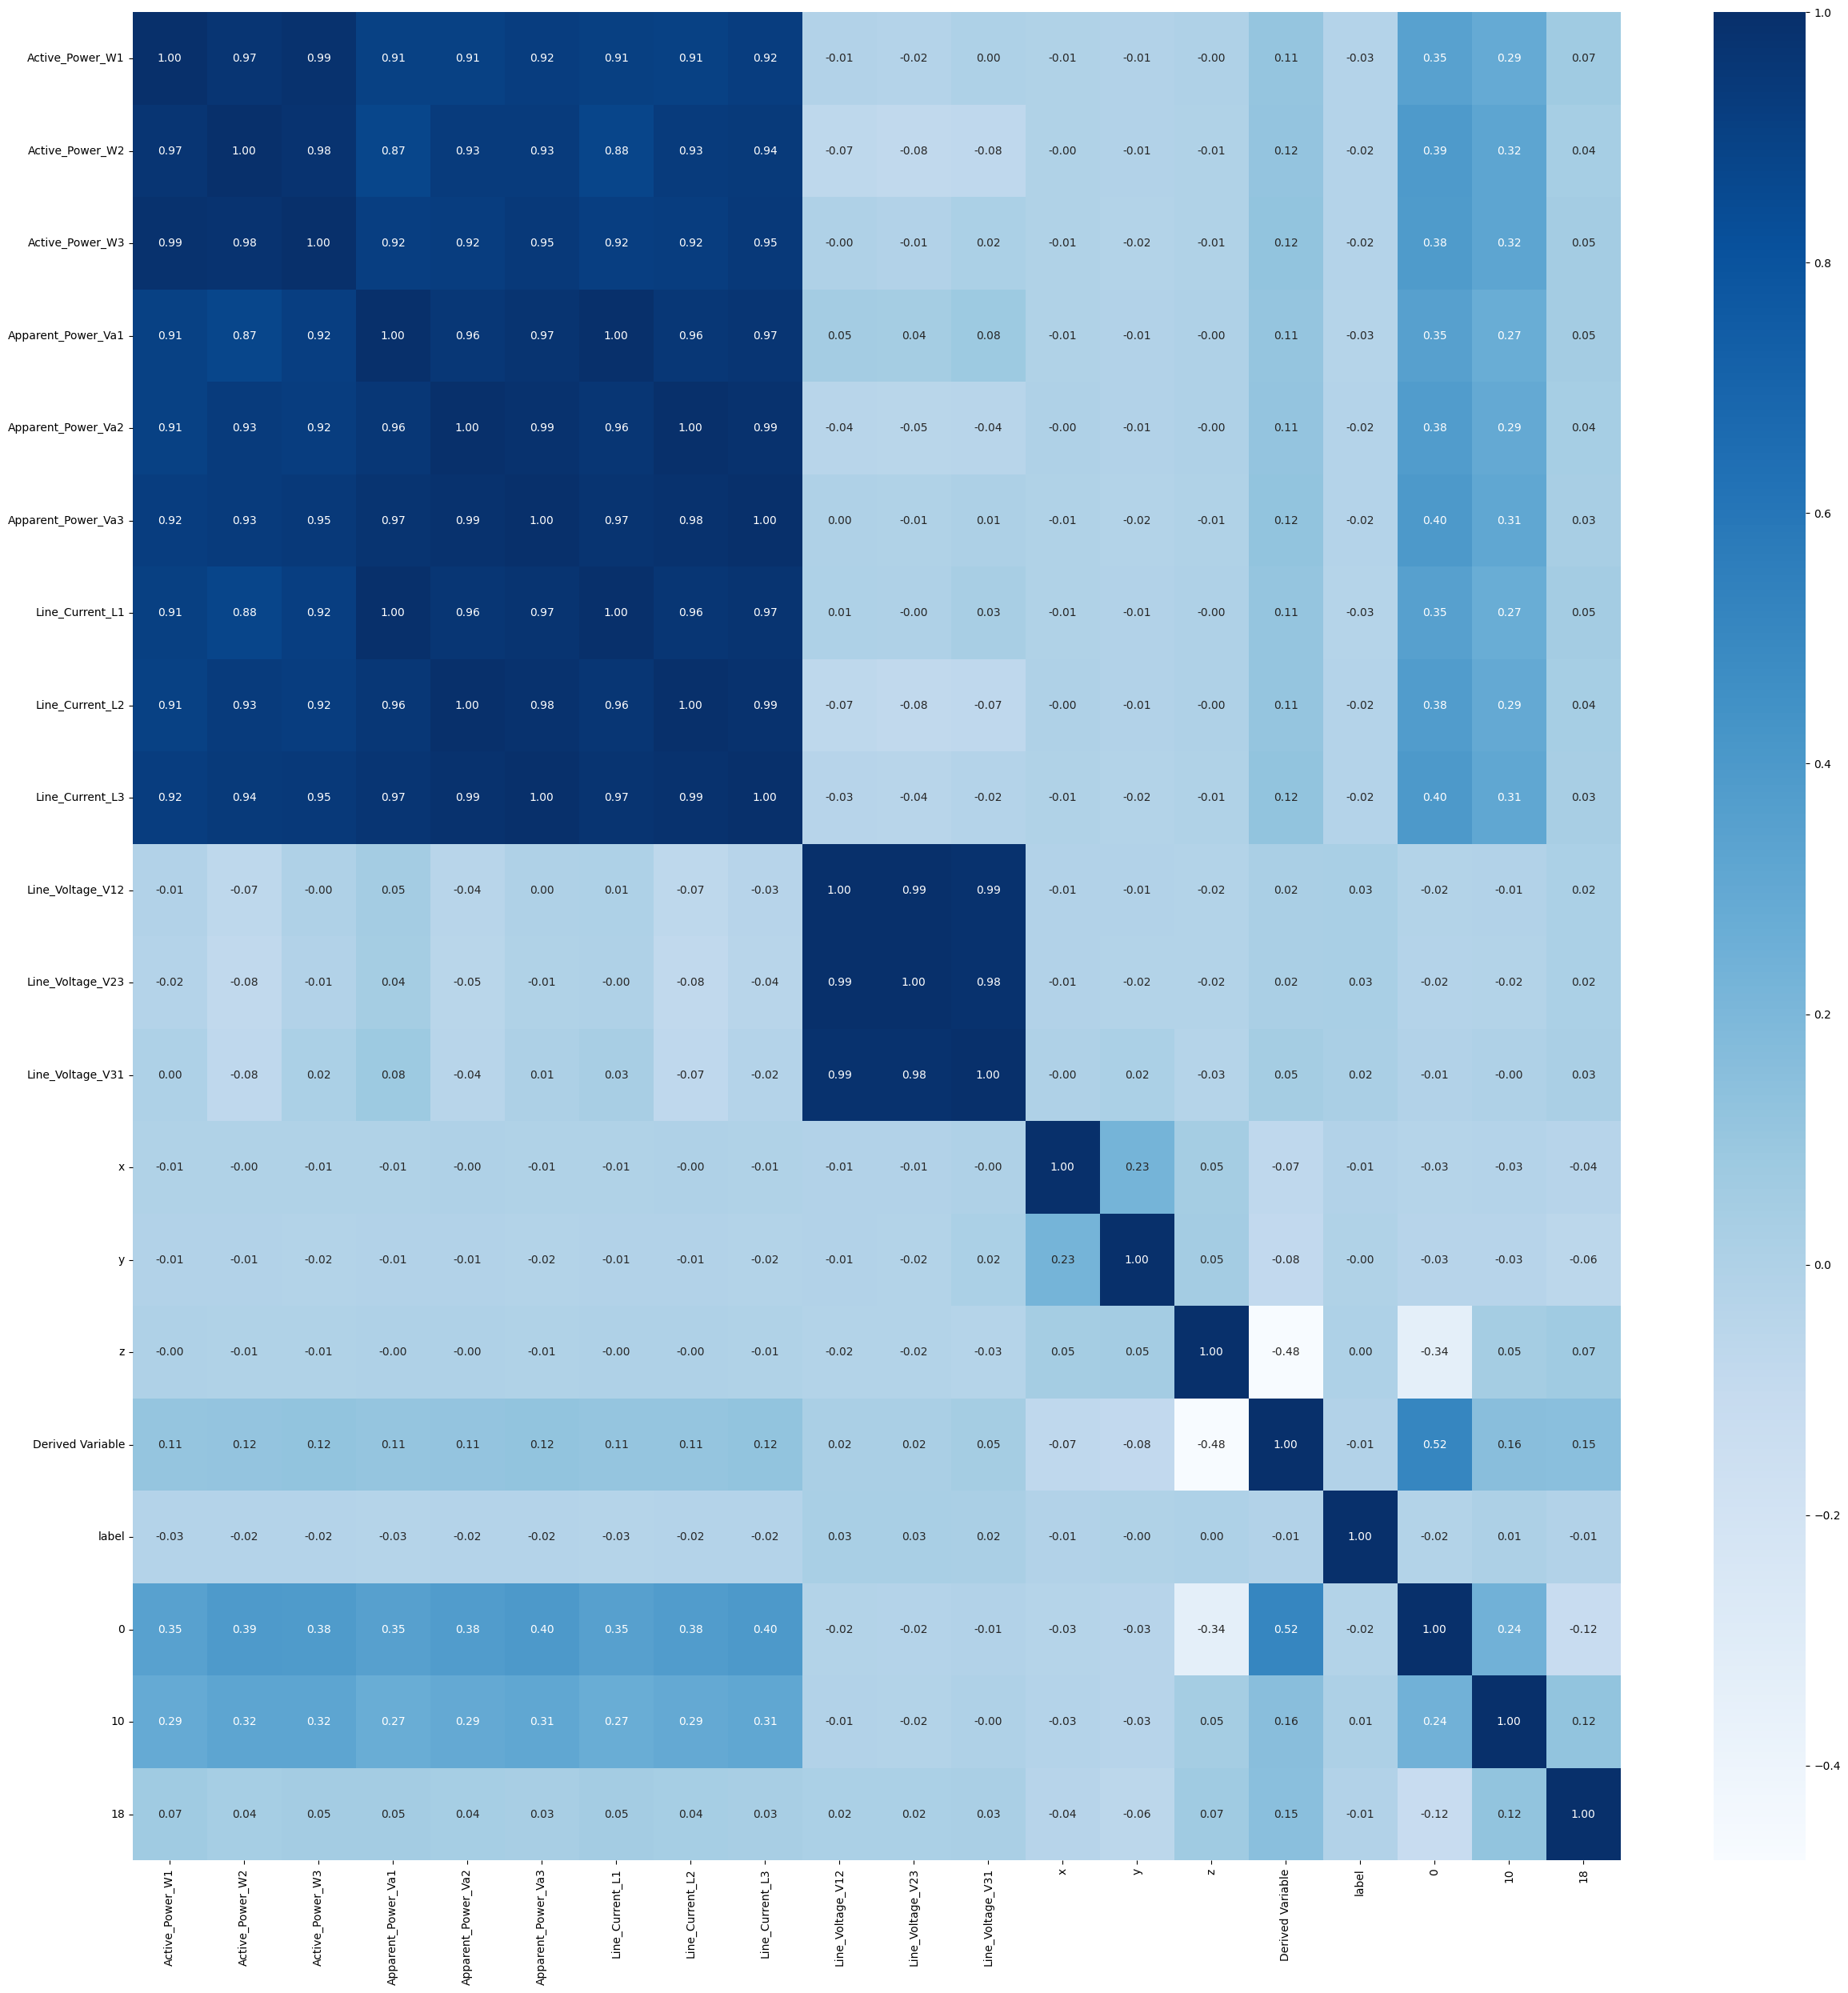

In [ ]:
corr_66 = Label_66.drop('Time',axis=1).corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_66, annot=True, fmt=".2f", cmap="Blues")

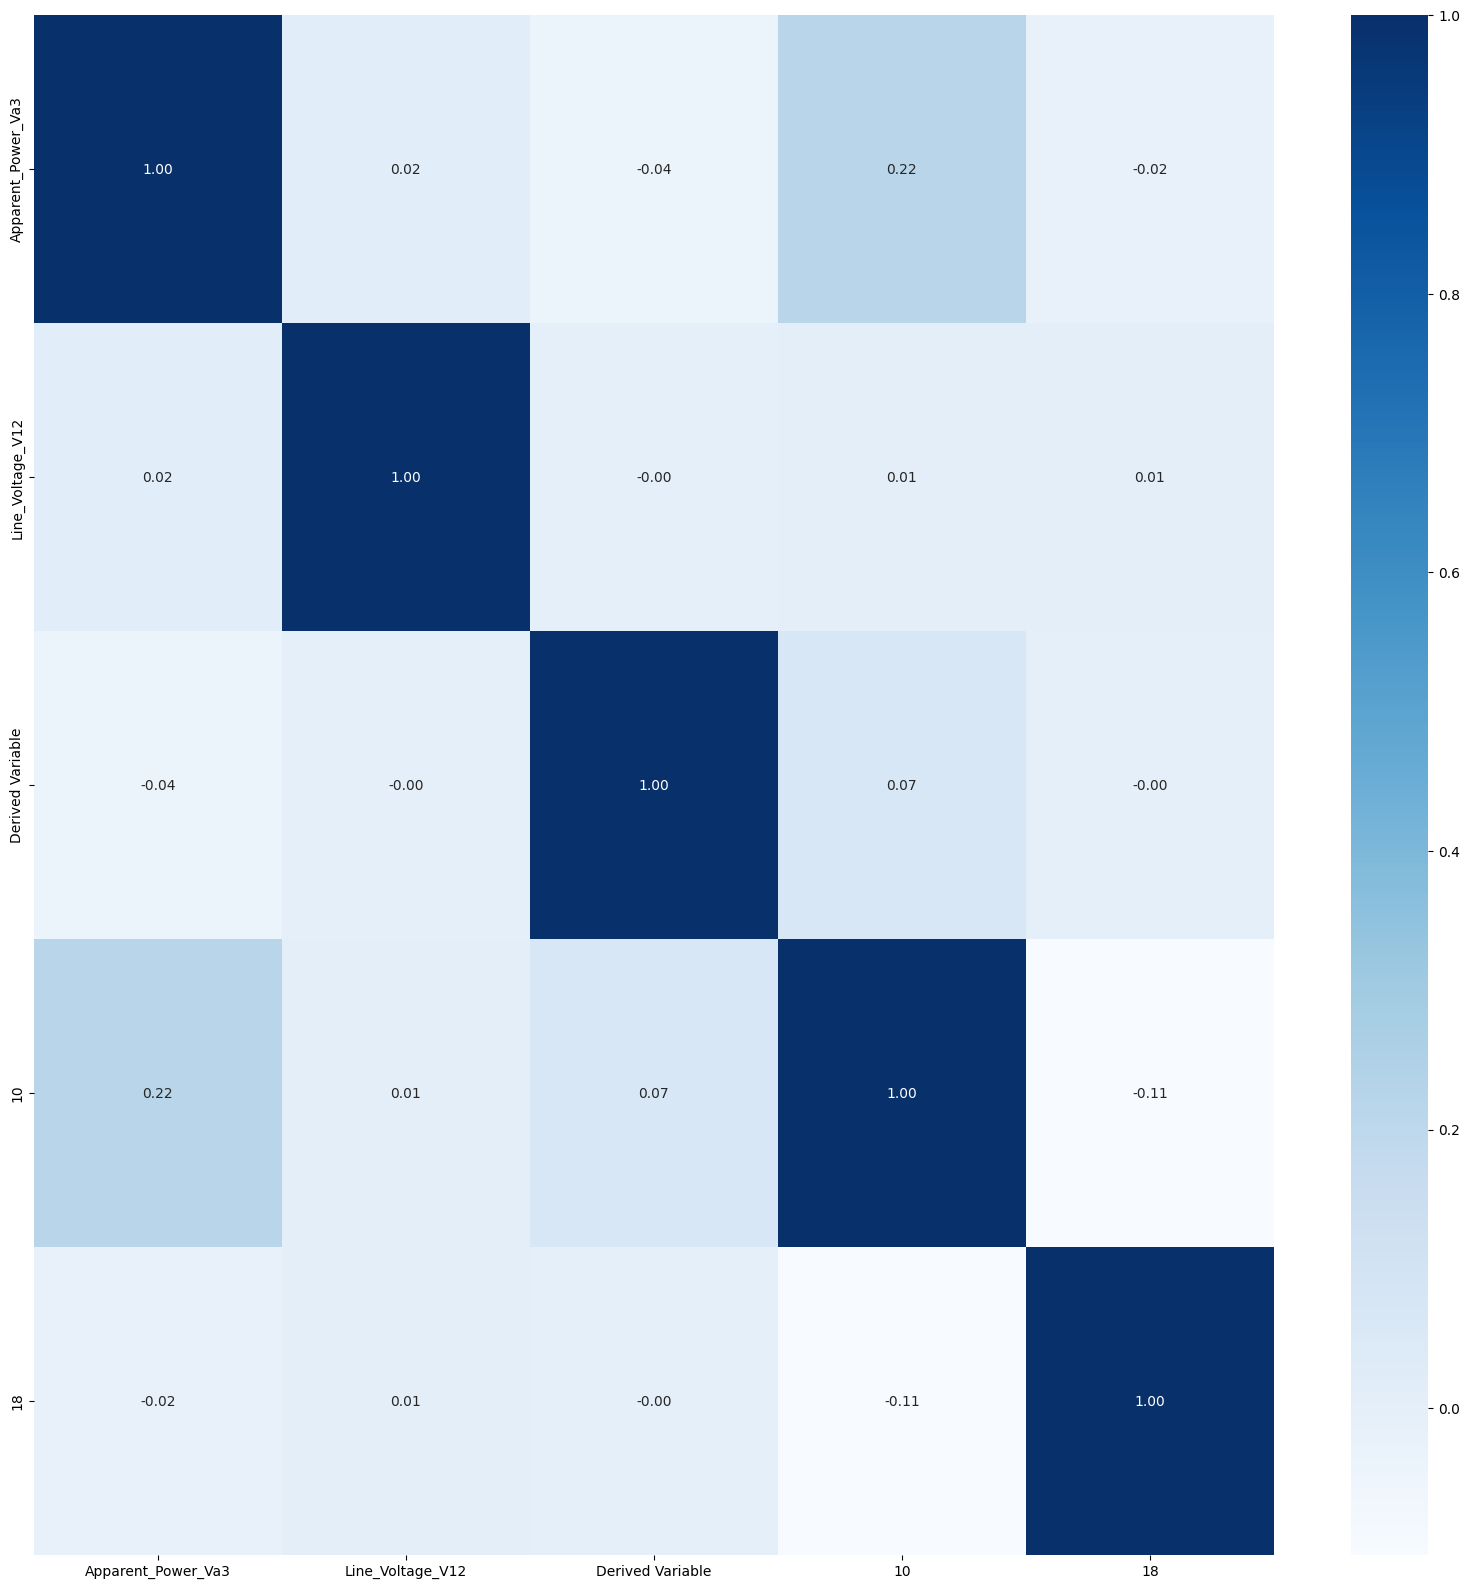

In [ ]:
Feature = [ "Apparent_Power_Va3", "Line_Voltage_V12",'Derived Variable','10','18']
corr_62 = Label_62[Feature].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_62, annot=True, fmt=".2f", cmap="Blues");

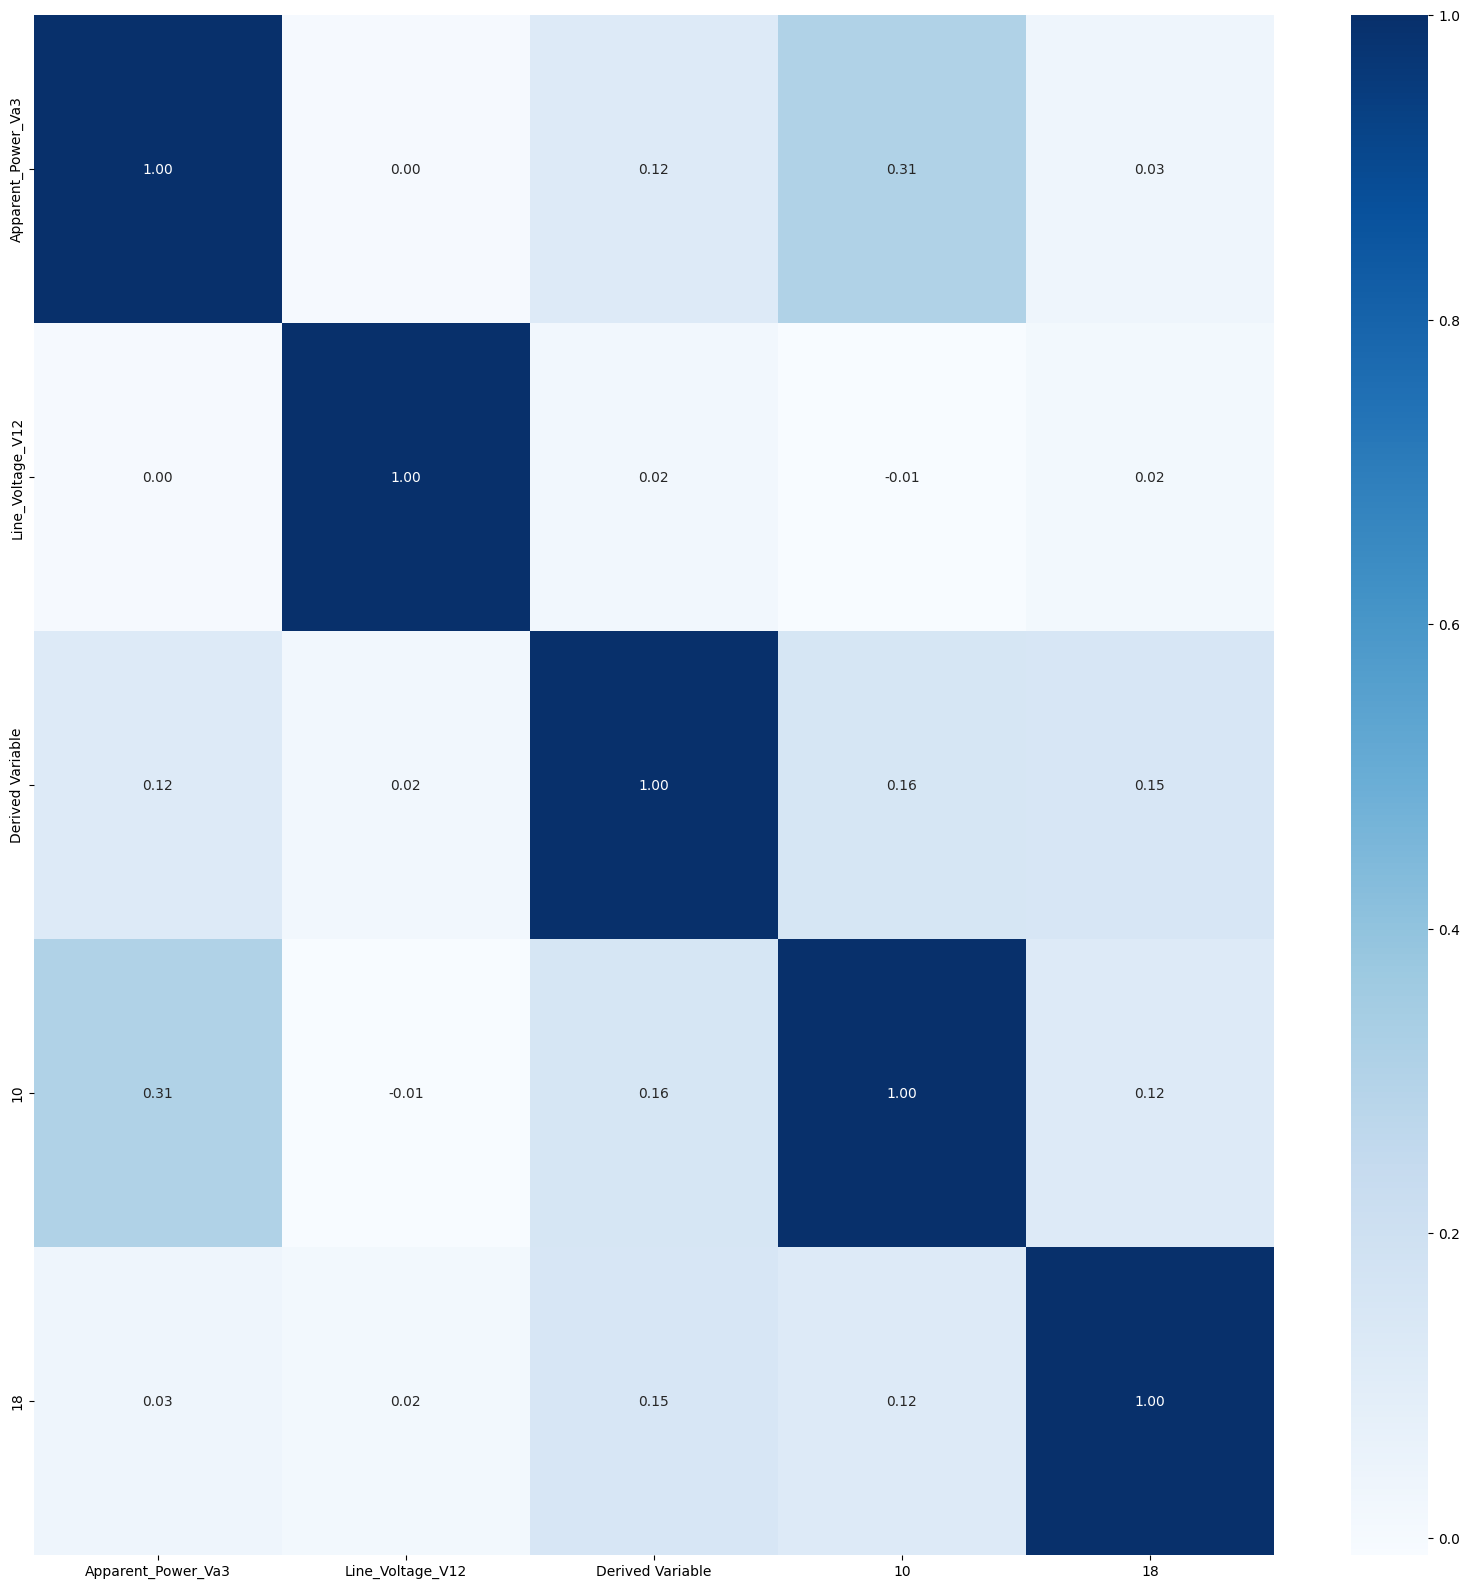

In [ ]:
corr_66 = Label_66[Feature].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_66, annot=True, fmt=".2f", cmap="Blues");